# **Riyadh Real Estate | عقارات الرياض**
written by: Nujud Almaleki

## Step 1. Dataset Selection

**Riyadh Real Estate | عقارات الرياض** dataset contains the features of properties offered in Riyadh (type, area, price, number of rooms, etc.). The aim is to analyze prices and market characteristics to understand trends and identify the factors influencing prices.

### Dataset Source
- **Kaggle:** https://www.kaggle.com/datasets/mohammedalsubaie/riyadh-real-estate?resource=download  


## Step 2. Problem Definition
My main goal is to explore how the housing market behaves and what factors impact property prices in this growing metropolis.

### Key Questions
1.	What are the most common property types listed in Riyadh?
2.	How are prices distributed? Are there outliers or price clusters?
3.	Does area (m²) have a strong relationship with price?
4. What is the impact of Property Type and District on the average price?
5. Which property types show the highest and lowest prices?
6. Which locations are expensive or affordable?
7.	Do rooms and bathrooms impact price?
8. Are there correlations between features?

These questions guide our analysis and help us extract meaningful insights.



## Step 3. Data Loading & Structure

In [130]:
# import the nessasery libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn import preprocessing

In [131]:
# download the dataset file from my google drive to the google colab
!gdown --id 1qyoXJldvTpVaR7HPVypoAKwBpYZ0GGBU

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qyoXJldvTpVaR7HPVypoAKwBpYZ0GGBU
To: /content/Aqar_Riyadh.xlsx
100% 90.6k/90.6k [00:00<00:00, 66.2MB/s]


In [132]:
# load the dataset into a dataframe
df = pd.read_excel('/content/Aqar_Riyadh.xlsx')

In [133]:
# display first 5 rows to make sure it's loaded correctly
df.head()

,Property_ID,Property Type,Bedrooms,Bathrooms,Area,Price,Description,Location,District,City,Agency_Name
0,A877409248,دور,6,5.0,214 م2,"730,000","دور للبيع في بدر, جنوب الرياض",بدر، جنوب الرياض، الرياض,حي بدر,الرياض,NaN
1,W448904463,فیلا,5,6.0,440 م2,"4,800,000",فيلا للبيع في الملك فهد، شمال الرياض,الملك فهد، شمال الرياض، الرياض,حي الملك فهد,الرياض,NaN
2,M187516680,فیلا,11,6.0,445 م2,"5,000,000",فيلا للبيع في الوادي، شمال الرياض,الوادي، شمال الرياض، الرياض,حي الوادي,الرياض,NaN
3,H808583263,دور,6,5.0,185 م2,"1,200,000",دور للبيع في المونسية، شرق الرياض,المونسية، شرق الرياض، الرياض,حي المونسية,الرياض,NaN
4,T501925005,فیلا,6,6.0,300 م2,"980,000",فيلا للبيع في بدر، جنوب الرياض,بدر، جنوب الرياض، الرياض,حي بدر,الرياض,مؤسسة غزالة للخدمات العقارية


In [134]:
# check the shape of the dataset (rows, columns)
df.shape

(1200, 11)

In [135]:
# display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_ID    1200 non-null   object 
 1   Property Type  1200 non-null   object 
 2   Bedrooms       1132 non-null   object 
 3   Bathrooms      1129 non-null   float64
 4   Area           1200 non-null   object 
 5   Price          1200 non-null   object 
 6   Description    1200 non-null   object 
 7   Location       1200 non-null   object 
 8   District       1200 non-null   object 
 9   City           1192 non-null   object 
 10  Agency_Name    821 non-null    object 
dtypes: float64(1), object(10)
memory usage: 103.3+ KB


In [136]:
# summary statistics for numerical columns
df.describe()

,Bathrooms
count,1129.000000
mean,3.955713
std,1.533834
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,14.000000


In [137]:
# Check for duplicated rows in the dataset
df.duplicated().sum()

np.int64(10)

In [138]:
# check for missing values in each column
df.isnull().sum()

,0
Property_ID,0
Property Type,0
Bedrooms,68
Bathrooms,71
Area,0
Price,0
Description,0
Location,0
District,0
City,8


### Main Observations
After loading the Riyadh Real Estate dataset, I explored its structure to understand the data before applying any cleaning or preprocessing steps, and I find that:

- The dataset contains 1200 rows and 11 columns.

- Most columns are categorical, while only one (Bathrooms) is numerical.

- The dataset includes missing values:

  - Bedrooms: 68 missing

  - Bathrooms: 71 missing

  - City: 8 missing

  - Agency_Name: 379 missing (very high)

- There are 10 duplicated rows that need to be removed.

- Column names are generally readable, but some values contain extra symbols (e.g., "2م" in Area) which need cleaning.




## Step 4. Data Cleaning

### 1. Remove the duplicates

In [139]:
# remove duplicated rows
df = df.drop_duplicates()

### 2. Removing non-numeric values and converting columns to numeric (float)

In [140]:
# remove non-numeric characters from Area and convert to float
df['Area'] = df['Area'].astype(str).str.replace("م2", "").str.replace(",", "").str.strip().astype(float)

# remove commas and any non-numeric characters from Price and convert to float
df['Price'] = df['Price'].str.replace(r'[^0-9.]', '', regex=True).str.strip().astype(float)

# remove non-numeric characters from Bedrooms and convert to float
df['Bedrooms'] = df['Bedrooms'].str.replace(r'[^0-9.]', '0', regex=True).str.strip().astype(float)

In [141]:
# check the changes in the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_ID    1190 non-null   object 
 1   Property Type  1190 non-null   object 
 2   Bedrooms       1122 non-null   float64
 3   Bathrooms      1119 non-null   float64
 4   Area           1190 non-null   float64
 5   Price          1190 non-null   float64
 6   Description    1190 non-null   object 
 7   Location       1190 non-null   object 
 8   District       1190 non-null   object 
 9   City           1182 non-null   object 
 10  Agency_Name    811 non-null    object 
dtypes: float64(4), object(7)
memory usage: 111.6+ KB


### 3. Handling Categorical Data

In [142]:
# Removing extra spaces from categorical columns
categorical_cols = ['Property Type', 'Location', 'District', 'City']
for col in categorical_cols:
    df[col] = df[col].str.strip()

### 4. Handling Missing Values

In [143]:
df.isnull().sum()

,0
Property_ID,0
Property Type,0
Bedrooms,68
Bathrooms,71
Area,0
Price,0
Description,0
Location,0
District,0
City,8


#### a) Handling Agency_Name: 379 missing (very high)

In [144]:
# Drop Agency_Name completely (too many missing)
df = df.drop(columns=['Agency_Name'])

#### b) Handling City: 8 missing

In [145]:
# Fill City with most common value
df['City'] = df['City'].fillna(df['City'].mode()[0])

#### c) Handling Bedrooms & Bathrooms Missing Values

In [146]:
# 1) Identify unique property types
df['Property Type'].unique()

array(['دور', 'فیلا', 'ارض سكنية', 'عمارة سكنية', 'شقة', 'عمارة',
       'استراحة', 'ارض'], dtype=object)

In [147]:
# Define non-residential categories (no bedrooms/bathrooms)
non_residential = ['ارض سكنية', 'ارض', 'عمارة', 'عمارة سكنية']

In [148]:
# 2) Assign 0 where bedrooms & bathrooms are not applicable
df.loc[df['Property Type'].isin(non_residential), ['Bedrooms', 'Bathrooms']] = 0

In [149]:
# Check again for missing values
df.isnull().sum()

,0
Property_ID,0
Property Type,0
Bedrooms,1
Bathrooms,1
Area,0
Price,0
Description,0
Location,0
District,0
City,0


In [150]:
# 3) Fill missing Bedrooms with median of each Property Type
df['Bedrooms'] = df.groupby('Property Type')['Bedrooms'].transform(
    lambda x: x.fillna(x.median())
)

# 4) Fill missing Bathrooms with median of each Property Type
df['Bathrooms'] = df.groupby('Property Type')['Bathrooms'].transform(
    lambda x: x.fillna(x.median())
)

In [151]:
# 5) Final check
df.isnull().sum()

,0
Property_ID,0
Property Type,0
Bedrooms,0
Bathrooms,0
Area,0
Price,0
Description,0
Location,0
District,0
City,0


### 5. Save the clean dataset as CSV

In [152]:
df.to_csv("clean_data.csv", index=False, encoding="utf-8-sig")
print("Dataset cleaned and saved as clean_data.csv")

Dataset cleaned and saved as clean_data.csv


## Step 5. Exploratory Data Analysis (EDA)

### 1)	What are the most common property types listed in Riyadh?


In [153]:
# create a mapping dictionary to convert Arabic property types to English for visualization
type_map = {
    'فیلا': 'Villa',
    'دور': 'Floor',
    'شقة': 'Apartment',
    'عمارة': 'Building',
    'عمارة سكنية': 'Res. Building',
    'استراحة': 'Rest House',
    'ارض سكنية': 'Res. Land',
    'ارض': 'Land'
}

# apply the mapping to create a new column
df['Property_Type_En'] = df['Property Type'].map(type_map)

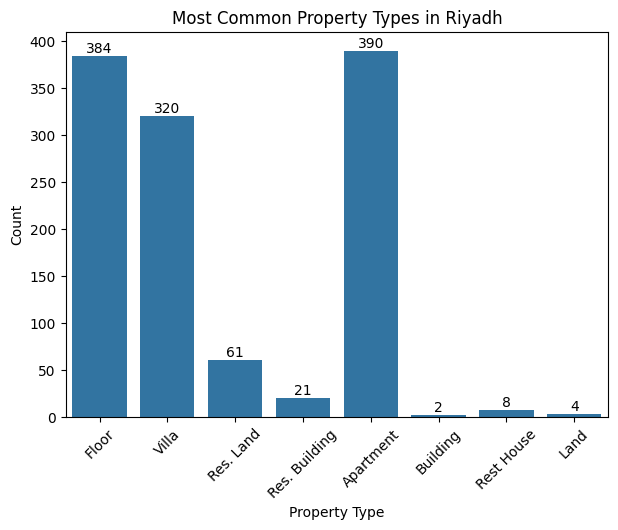

In [154]:
# plot a bar chart of property type counts
plt.figure(figsize=(7,5))
ax = sns.countplot(data=df, x='Property_Type_En')

# add value labels on top of each bar for better readability
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), count,
            ha='center', va='bottom', fontsize=10)

# add title and axis labels
plt.title("Most Common Property Types in Riyadh")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


From the bar chart, it is clear that the most common property types in Riyadh are Apartment, Floor, and Villa, with each having over 300 listings.
Other types such as Residential Land appear less frequently, while Building, Land, and Rest House occur only in a few records — indicating that they are rare within the dataset.

### 2) How are prices distributed? Are there outliers or price clusters?

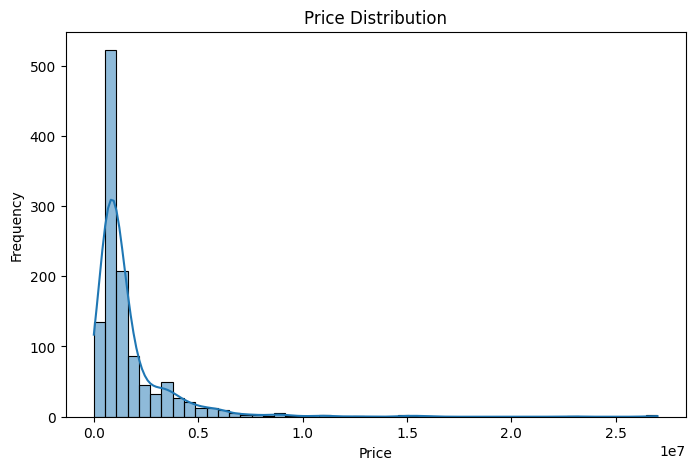

In [155]:
# draw a histplot to show price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


the histogram shows that most properties are priced in the lower range, indicating that affordable and mid-range properties make up the majority of the market.
as prices increase, the number of properties decreases sharply, which means expensive units are not common.

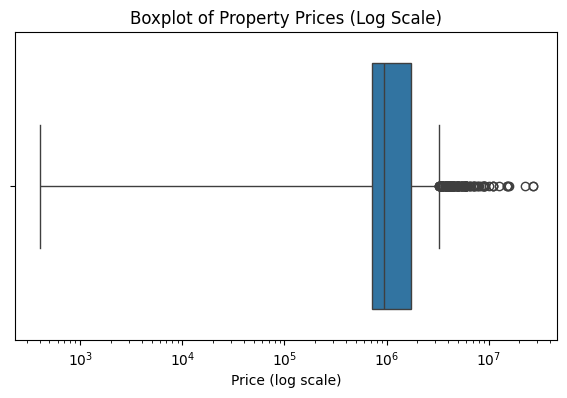

In [156]:
# draw a boxplot to show price distribution
plt.figure(figsize=(7,4))
sns.boxplot(x=df['Price'])

# use log scale to make extreme values more visible
plt.xscale('log')

# add labels and title
plt.title("Boxplot of Property Prices (Log Scale)")
plt.xlabel("Price (log scale)")
plt.show()

the boxplot confirms that a large number of properties are priced normally within a specific range, while several properties lie far outside this range, appearing as outliers.
these outliers represent high-end or unique properties with significantly higher prices.

both plots together show that Riyadh’s real estate market is mostly concentrated around moderate prices, with a smaller luxury segment that appears as outliers — this indicates a divided market with typical pricing and a premium category.

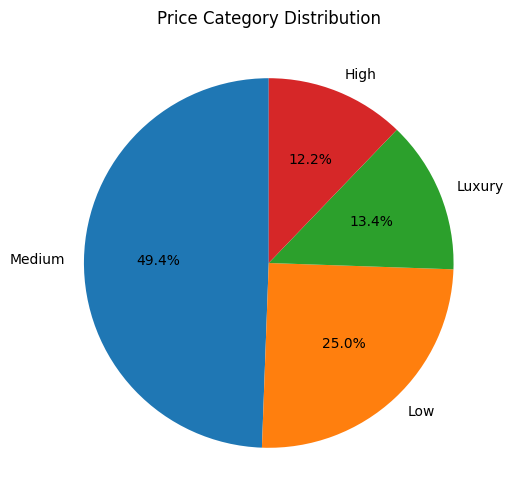

In [157]:
# calculate price categories automatically using quartiles
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
upper_limit = q3 + 1.5 * (q3 - q1)

# function to classify prices into categories
def price_category(price):
    # return label based on price range
    if price < q1:
        return 'Low'
    elif price < q3:
        return 'Medium'
    elif price < upper_limit:
        return 'High'
    else:
        return 'Luxury'

# apply category function
df['Price_Category'] = df['Price'].apply(price_category)

# plot result
plt.figure(figsize=(6,6))
df['Price_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Price Category Distribution')
plt.ylabel('')
plt.show()


to better understand the price distribution, properties were grouped into four categories using the IQR method.
nearly half of the listings fall into the medium-price range, while only a small portion belong to the high and luxury categories.
this supports the boxplot findings, showing that the market is mainly concentrated around typical prices with fewer premium properties.

### 3) Does area (m²) have a strong relationship with price?


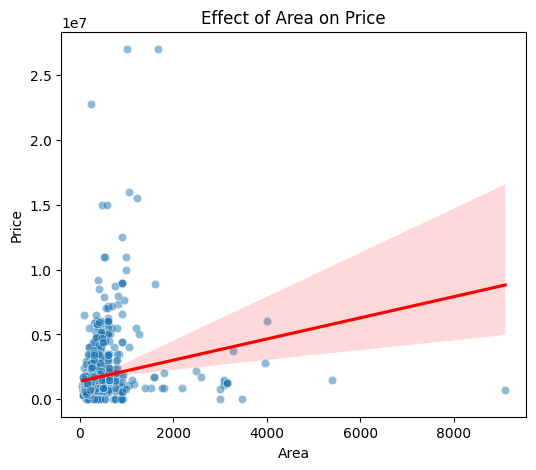

In [158]:
# plot scatter to examine relationship between area and price
plt.figure(figsize=(6,5))
sns.scatterplot(x='Area', y='Price', data=df, alpha=0.5)
sns.regplot(x='Area', y='Price', data=df, scatter=False, color='red')
plt.title('Effect of Area on Price')
plt.show()

The scatter plot with regression line shows a weak positive relationship between area and price.
Most properties are clustered within small areas (under 1,000 m²), but their prices vary significantly.
Some large-area properties do not have high prices, indicating that area alone is not a strong predictor of price.
The presence of outliers suggests that other features may influence price more than area.

In [159]:
# calculate correlation between area and price
corr = df['Area'].corr(df['Price'])
corr

np.float64(0.18785378487123292)

The correlation value is approximately 0.18, confirming that the relationship between area and price is weak.

### 4) What is the impact of Property Type and District on the average price?

In [160]:
# Calculate the average price for each property type
df.groupby('Property Type')['Price'].mean().sort_values(ascending=False)

,Price
Property Type,
فیلا,3.428683e+06
عمارة سكنية,3.248476e+06
استراحة,2.780000e+06
عمارة,2.150000e+06
ارض سكنية,1.626858e+06
ارض,1.162800e+06
دور,9.875349e+05
شقة,8.234847e+05


In [161]:
# Calculate the average price for each district (district impact on price)
df.groupby('District')['Price'].mean().sort_values(ascending=False)

,Price
District,
حي الصفا,1.249950e+07
حي الملك عبدالله,9.000000e+06
حي الرحمانية,7.680000e+06
حي جرير,7.500000e+06
حي المغرزات,6.714333e+06
...,...
حي عريض,2.905146e+05
حي المرقب,2.800000e+05
حي المرسلات,1.000000e+04


The results show that both Property Type and District have a strong impact on pricing.

Villas and residential buildings recorded the highest average prices, while other property types such as apartments showed lower averages.

Similarly, there is a significant variation in prices between districts, where neighborhoods such as حي الصفا and حي الملك عبدالله have much higher average prices compared to other areas.

This indicates that location and property type are key factors affecting real estate value, making them strong candidates as important features for further predictive modeling.

### 5) Which property types show the highest and lowest prices?

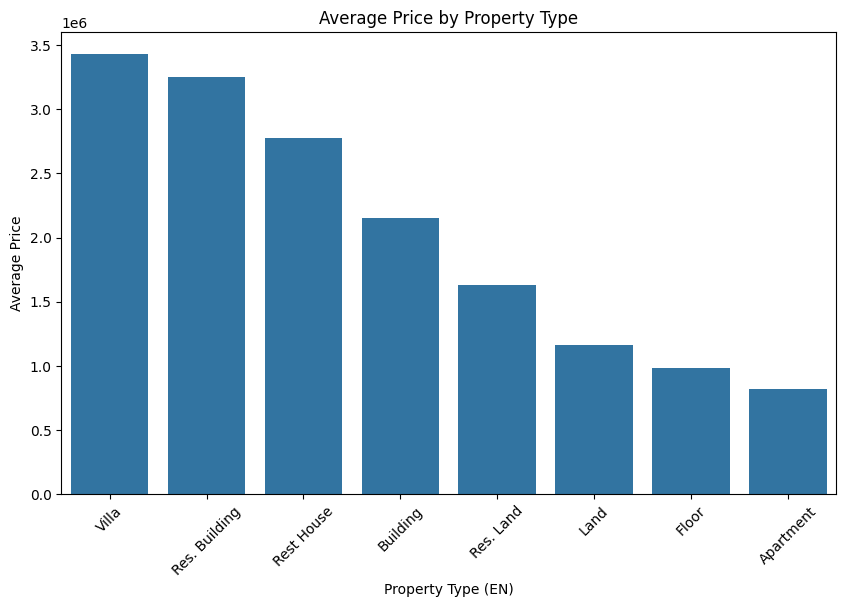

In [162]:
# Average price per property type
property_price_en = df.groupby('Property_Type_En')['Price'].mean().sort_values(ascending=False)


# Bar plot to visualize price differences between property types
plt.figure(figsize=(10,6))
sns.barplot(x=property_price_en.index, y=property_price_en.values)
plt.title('Average Price by Property Type')
plt.xlabel('Property Type (EN)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


The bar chart shows the average price for each property type.
Villas and residential buildings have the highest average prices, while apartments and single-floor properties show the lowest prices.
This indicates that property type has a strong influence on real estate pricing, making it a key factor to consider in further analysis and prediction models.

### 6)	Which locations are expensive or affordable?


In [163]:
# calculate price per m²
df['Price_per_m2'] = df['Price'] / df['Area']

# create numeric codes for districts
unique_districts = df['District'].unique()
district_map = {name: f"D{i+1}" for i, name in enumerate(unique_districts)}

# add district code column
df['District_Code'] = df['District'].map(district_map)

# calculate average price per m² for each district (code + original name)
avg_ppm = (
    df.groupby(['District_Code', 'District'])['Price_per_m2']
      .mean()
      .reset_index()
)

# sort districts from most to least expensive
avg_ppm_sorted = avg_ppm.sort_values('Price_per_m2', ascending=False)

# select top 5 most expensive and bottom 5 most affordable
top_5 = avg_ppm_sorted.head(5)
bottom_5 = avg_ppm_sorted.tail(5)

/tmp/ipython-input-3961355088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


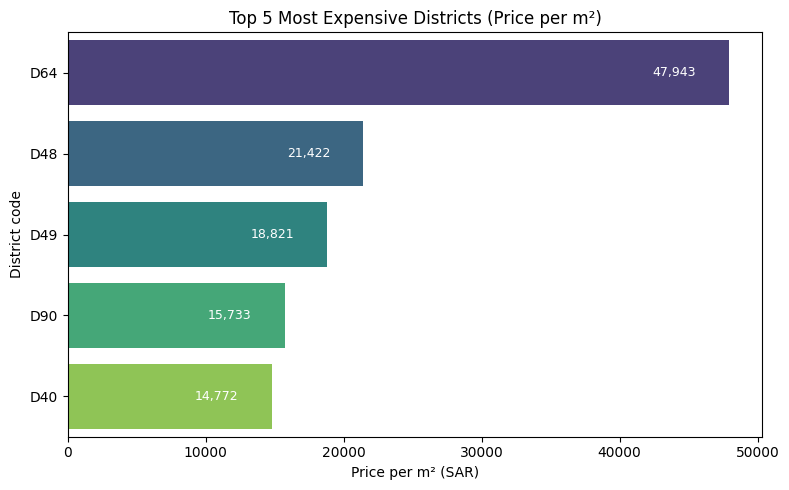

most expensive district:
 code: D64
 name: حي الصفا
 avg price per m²: 47943.35



In [164]:
# plot top 5 most expensive districts
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Price_per_m2',
    y='District_Code',
    data=top_5,
    palette='viridis'
)
plt.title("Top 5 Most Expensive Districts (Price per m²)")
plt.xlabel("Price per m² (SAR)")
plt.ylabel("District code")

max_val = top_5['Price_per_m2'].max()

# add value labels inside bars
for i, v in enumerate(top_5['Price_per_m2']):
    ax.text(
        v - max_val * 0.05,
        i,
        f"{int(v):,}",
        va='center',
        ha='right',
        fontsize=9,
        color='white'
    )

plt.tight_layout()
plt.show()

# print most expensive district (code + arabic name)
most_expensive = avg_ppm_sorted.iloc[0]
print("most expensive district:")
print(" code:", most_expensive['District_Code'])
print(" name:", most_expensive['District'])
print(" avg price per m²:", round(most_expensive['Price_per_m2'], 2))
print()

/tmp/ipython-input-1130738231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


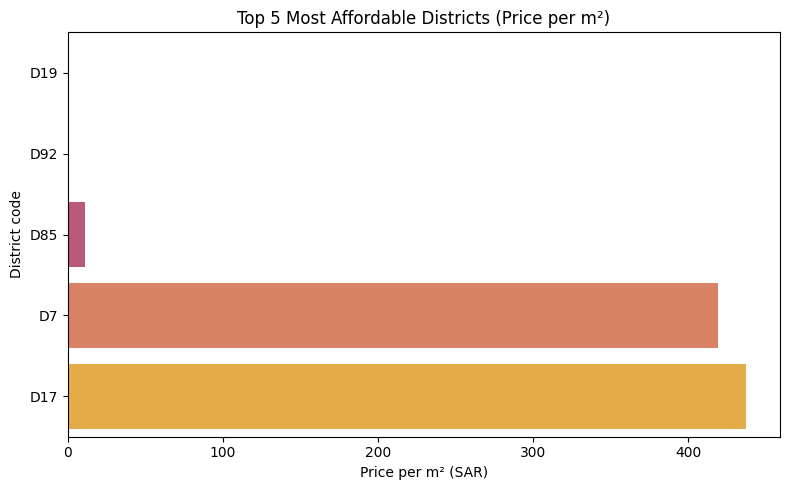

most affordable district:
 code: D19
 name: حي العلا
 avg price per m²: 0.57


In [165]:
# plot top 5 most affordable districts
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Price_per_m2',
    y='District_Code',
    data=bottom_5.sort_values('Price_per_m2'),
    palette='plasma'
)
plt.title("Top 5 Most Affordable Districts (Price per m²)")
plt.xlabel("Price per m² (SAR)")
plt.ylabel("District code")

max_val_bottom = bottom_5['Price_per_m2'].max()

plt.tight_layout()
plt.show()

# print most cheapest district (code + arabic name)
cheapest = avg_ppm_sorted.iloc[-1]
print("most affordable district:")
print(" code:", cheapest['District_Code'])
print(" name:", cheapest['District'])
print(" avg price per m²:", round(cheapest['Price_per_m2'], 2))

The visualizations clearly show a significant difference between districts in terms of average price per square meter.
- From the first chart, district D64 (حي الصفا) stands out as the most expensive area with a very high average price per m² (around 47,943 SAR), which is much higher than the other top districts. This indicates that D64 is likely a premium location, possibly offering better services, facilities, or a strategic location.
- On the other hand, the second chart highlights the most affordable districts, where D19 (حي العلا) has the lowest average price per m² (around 0.57 SAR), which may indicate that this area is still under development or lacks infrastructure.

the visualizations show a strong relationship between district  and price. Some districts have significantly higher average prices per m², while others are much more affordable.
This large variation indicates that district is one of the most influential factors in determining property value.

### 7) Do rooms and bathrooms impact price?


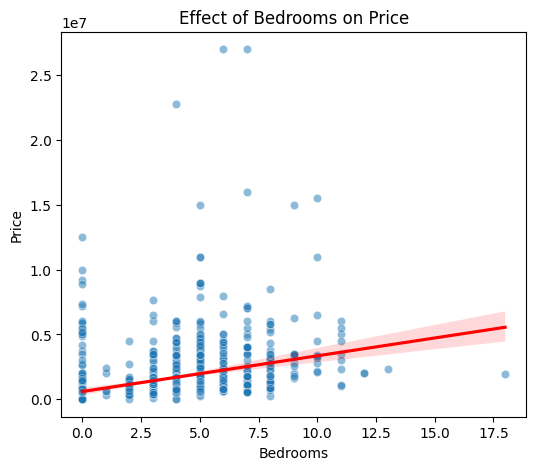

In [166]:
# plot scatter to examine the relationship between bedrooms and price
plt.figure(figsize=(6,5))
sns.scatterplot(x='Bedrooms', y='Price', data=df, alpha=0.5)
sns.regplot(x='Bedrooms', y='Price', data=df, scatter=False, color='red')
plt.title('Effect of Bedrooms on Price')
plt.show()


The scatter plot shows that adding more bedrooms generally increases the price, but the relationship is not very strong.
The regression line has a slight positive slope, meaning that properties with more bedrooms tend to be more expensive.
However, the data points are widely scattered, which indicates that the price is also affected by other factors besides bedrooms (such as location, land size, or overall house quality).

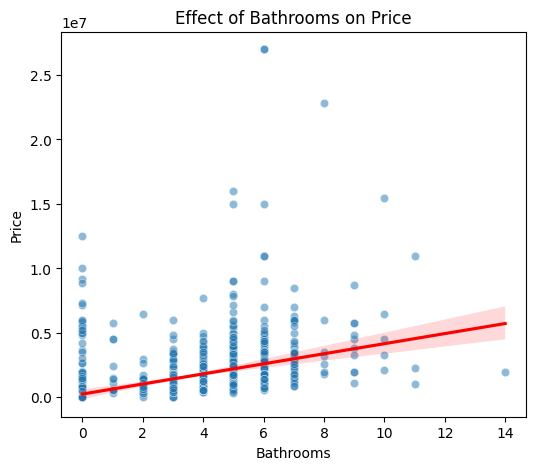

In [167]:
# plot scatter to examine the relationship between bathrooms and price
plt.figure(figsize=(6,5))
sns.scatterplot(x='Bathrooms', y='Price', data=df, alpha=0.5)
sns.regplot(x='Bathrooms', y='Price', data=df, scatter=False, color='red')
plt.title('Effect of Bathrooms on Price')
plt.show()


Similar to bedrooms, Bathrooms also have a weak positive impact on price.
They contribute to price increase, but they alone cannot predict property price accurately.

### 8)	Are there correlations between features?


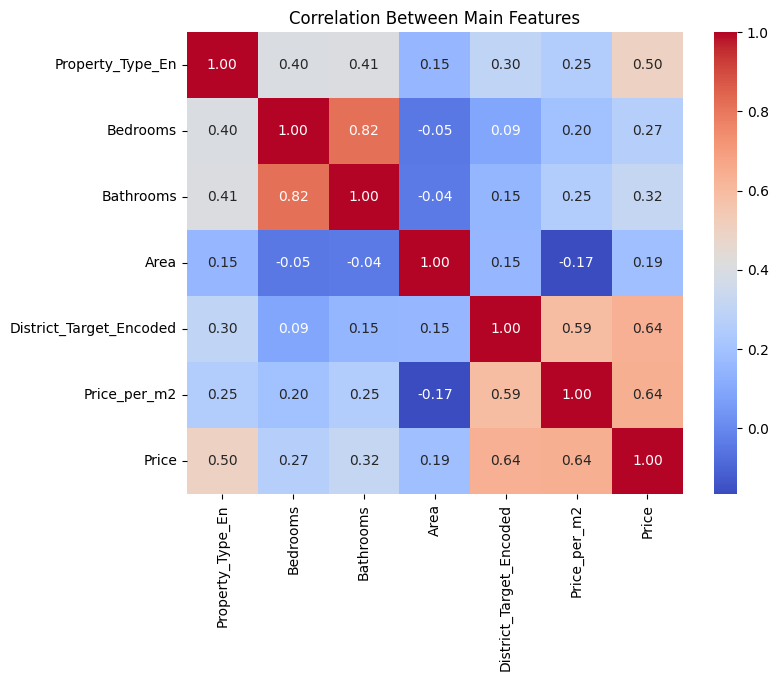

In [168]:
# Compute average price per district
district_target_map = df.groupby('District')['Price'].mean().to_dict()

# Apply the encoded version
df['District_Target_Encoded'] = df['District'].map(district_target_map)

# Create a copy to avoid modifying the original DataFrame
features = df[['Property_Type_En', 'Bedrooms', 'Bathrooms',
               'Area', 'District_Target_Encoded', 'Price_per_m2', 'Price']].copy()

encoder = LabelEncoder()

# Encoding for categorical features (Property type & District)
features['Property_Type_En'] = encoder.fit_transform(features['Property_Type_En'])

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Main Features")
plt.show()

The heatmap shows the correlations between the main features and the property price.
Categorical variables such as property type and district were encoded to numerical form to make them compatible with correlation analysis.
After encoding, the results revealed that price per square meter and district are the most influential features, followed by property type, bathrooms, and bedrooms.
This indicates that both the location and property characteristics have a strong impact on real estate prices, making them important predictors for future modeling.

## Step 6. Final Insights Summary

After exploring the Real Estate dataset in Riyadh and answering the main analytical questions, here are the key insights:

----------------------------

### 1. Relationship Between Price and District (Neighborhood)

Insight:
There is a clear variation in average property prices across different districts.
Some districts consistently show significantly higher prices per square meter, indicating that location is a strong factor influencing real estate value.
This highlights the importance of district selection when evaluating property investments.

----------------------------

### 2. Impact of Property Type on Price

Insight:
Property type has a noticeable effect on the final price.
Certain types of real estate (e.g., villas or residential buildings) tend to be more expensive than apartments or land.
This suggests that property type plays a major role in determining market value and investment potential.

----------------------------

### 3. Area and Price Relationship

Insight:
There is a positive relationship between area and price, meaning larger properties generally tend to cost more.
However, some outliers show properties with small areas but high prices — this may indicate premium locations or renovated properties with higher value.

----------------------------

### 4. Price per Square Meter as a Better Indicator

Insight:
By creating the new feature Price_per_m2, a clearer pattern emerged.
This metric helped compare properties more fairly and showed which districts provide better value for money.
It also revealed districts with overpriced properties compared to their actual area.

----------------------------

### 5. District and Price_per_m2 – Strongest Relationship

Insight:
The district showed the strongest correlation with Price_per_m2.
This confirms that location is the most influential factor in Riyadh’s real estate market, more than rooms, bathrooms, or area alone.

----------------------------

### Overall Conclusion:

- Location (district) is the most important factor affecting real estate prices.

- Property type also plays a noticeable role in determining price.

- Area correlates with price, but Price_per_m2 gives a more accurate understanding of real value.

- Outliers suggest the presence of luxury properties or unique investment opportunities.

These insights provide a clearer understanding of the Riyadh real estate market and can support smarter decision-making for buyers, investors, and urban planning.